# Group Detetails

1. Name= Kashif Riyaz    Matriculation Number= 
2. Name= Nitesh Morem

#  importing necessary modules

In [3897]:
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install scipy
!pip install matplotlib

In [3972]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:

from matplotlib.colors import ListedColormap

In [3899]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# 1. Task 1 (Data Preprocessing)


## a)



In [3900]:
# reading  coachs csv file
df_feco=pd.read_csv('female_coaches.csv')
df_maco=pd.read_csv('male_coaches.csv')
print(f'The shape of female_coaches.csv file is {df_feco.shape} and male_coaches.csv file is {df_maco.shape}')
# reading players csv file
df_fepl=pd.read_csv('female_players.csv')
df_mapl=pd.read_csv('male_players.csv')
print(f'The shape of female_players.csv file is {df_fepl.shape} and male_players.csv file is {df_mapl.shape}')
# reading teams
df_fete=pd.read_csv('female_teams.csv')
df_mate=pd.read_csv('male_teams.csv')
print(f'The shape of female_teams.csv file is {df_fete.shape} and male_teams.csv file is {df_mate.shape}')


The shape of female_coaches.csv file is (94, 8) and male_coaches.csv file is (1369, 8)


C:\Users\kashi\AppData\Local\Temp\ipykernel_12980\2433300494.py:7: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mapl=pd.read_csv('male_players.csv')


The shape of female_players.csv file is (5035, 109) and male_players.csv file is (180021, 109)
The shape of female_teams.csv file is (231, 54) and male_teams.csv file is (6947, 54)


## b)


In [3901]:
# checking the total number of columns in data frame
df_fepl_columns= len(df_fepl.columns)
df_mapl_columns=len(df_mapl.columns)
print(f'There are {df_fepl_columns} columns in female_players.CSV file and {df_mapl_columns} columns in male_players.CSV file.')
df_fete_columns=len(df_fete.columns)
df_mate_columns=len(df_mate.columns)
print(f'There are {df_fete_columns} columns in female_teams.CSV file and {df_mate_columns} columns in male_teams.CSV file.  ')
df_feco_columns=len(df_feco.columns)
df_maco_columns=len(df_maco.columns)
print(f'There are {df_feco_columns} columns in female_feco.CSV file and {df_maco_columns} columns in male_maco.CSV file.  ')

There are 109 columns in female_players.CSV file and 109 columns in male_players.CSV file.
There are 54 columns in female_teams.CSV file and 54 columns in male_teams.CSV file.  
There are 8 columns in female_feco.CSV file and 8 columns in male_maco.CSV file.  


## C)


In [3902]:
# adding additional columns to all six DataFrames
df_fete['Sex']=np.zeros(len(df_fete))
df_mate['Sex']=np.ones(len(df_mate))

df_mapl['Sex']=np.ones(len(df_mapl))
df_fepl['Sex']=np.zeros(len(df_fepl))

df_maco['Sex']=np.ones(len(df_maco))
df_feco['Sex']=np.zeros(len(df_feco))


In [3903]:
# merging the DataFrames with same Sex
player=pd.concat([df_fepl,df_mapl],ignore_index=True)
coach=pd.concat([df_feco,df_maco],ignore_index=True)
team=pd.concat([df_fete,df_mate],ignore_index=True)


## d)



In [3904]:
# creating df_plyayers with 27 columns.
df_player=player[['player_id', 'fifa_version', 'long_name',
'player_positions', 'value_eur', 'wage_eur', 'dob', 'height_cm', 'weight_kg',
'club_team_id', 'club_name', 'league_id', 'league_name', 'club_position',
'club_jersey_number','club_joined_date', 'club_contract_valid_until_year',
'nationality_id', 'nationality_name', 'nation_team_id', 'preferred_foot',
'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','Sex']]
# creating df_teams with 18 columns
df_team=team[['team_id', 'fifa_version', 'team_name', 'league_id',
'league_name', 'nationality_id', 'nationality_name', 'overall', 'attack',
'midfield', 'defence', 'coach_id', 'home_stadium', 'whole_team_average_age',
'captain', 'penalties', 'left_corner', 'right_corner','Sex']]
# cretaing df_coaches with 4 columns
df_coach=coach[['coach_id', 'long_name', 'dob', 'nationality_name','Sex']]

# checking the shape of every DataFrame
print(f'The shape of the df_players DataFrame is {df_player.shape}')
print(f'The shape of the df_teams DataFrame is {df_team.shape}')
print(f'The shape of the df_coaches DataFrame is {df_coach.shape}')

The shape of the df_players DataFrame is (185056, 28)
The shape of the df_teams DataFrame is (7178, 19)
The shape of the df_coaches DataFrame is (1463, 5)


## e)


### I)  Working on df_coach

In [3905]:
# columns in this data set
df_coach.columns

Index(['coach_id', 'long_name', 'dob', 'nationality_name', 'Sex'], dtype='object')

In [3906]:
#checking the missingn values on the data frame
missing_value=df_coaches.isnull().sum().to_frame(name='number of missing values')
print(f'The number of rows in the df_coaches are {df_coaches.shape[0]}')
missing_value

The number of rows in the df_coaches are 1463


,number of missing values
coach_id,0
long_name,0
dob,124
nationality_name,0
Sex,0


In [3907]:
# replacing the nan values with mean value in dob column
df_coach['dob']=pd.to_datetime(df_coach['dob'])
mean_value=df_coach['dob'].mean().date()
df_coach.loc[:,'dob']=df_coach['dob'].fillna(pd.Timestamp(mean_value))
df_coach.isnull().sum().to_frame(name='number of missing values')

C:\Users\kashi\AppData\Local\Temp\ipykernel_12980\1687720578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coach['dob']=pd.to_datetime(df_coach['dob'])


,number of missing values
coach_id,0
long_name,0
dob,0
nationality_name,0
Sex,0


here i have filled the missing value with the mean dob
* first i converted the vales of dob into timedate value
* then i calculated the mean and only took the date
*  at last i replaced the nan vales with mean data value

### II) Working on df_team

In [3908]:
df_team.columns


Index(['team_id', 'fifa_version', 'team_name', 'league_id', 'league_name',
       'nationality_id', 'nationality_name', 'overall', 'attack', 'midfield',
       'defence', 'coach_id', 'home_stadium', 'whole_team_average_age',
       'captain', 'penalties', 'left_corner', 'right_corner', 'Sex'],
      dtype='object')

In [3909]:
df_team.isnull().sum().to_frame(name='number of missing values')

,number of missing values
team_id,0
fifa_version,0
team_name,0
league_id,0
league_name,0
nationality_id,0
nationality_name,0
overall,0
attack,0
midfield,0


In the first section of this code the data in being grouped by the team_name and then the values in home stadium are filled by bfill()

In [3910]:
#using backward fill to fill the name of stadiums of the same teams in different veraions of fifa
df_team.loc[:,'home_stadium']=df_team.groupby('team_name')['home_stadium'].bfill().bfill()

# using backward fill to fill the coach_id in the same way
df_team.loc[:,'coach_id']=df_team.groupby('team_name')['coach_id'].bfill().bfill()

# using backward fill to fill the capitan as well
df_team.loc[:,'captain']=df_team.groupby('team_name')['captain'].bfill().bfill()

#using backward fill to fill the penalties as well(using the same penalty taker as in pervious version of fifa)
df_team.loc[:,'penalties']=df_team.groupby('team_name')['penalties'].bfill().bfill()

# using backwar fill to fill the left and right corner taker for the team
df_team.loc[:,'left_corner']=df_team.groupby('team_name')['left_corner'].bfill().bfill()
df_team.loc[:,'right_corner']=df_team.groupby('team_name')['right_corner'].bfill().bfill()


In [3911]:
df_team.isnull().sum().to_frame(name='number of missing values')

,number of missing values
team_id,0
fifa_version,0
team_name,0
league_id,0
league_name,0
nationality_id,0
nationality_name,0
overall,0
attack,0
midfield,0


### III) Working on df_plyaer

In [3912]:
df_player.isnull().sum().to_frame(name='number of missing values')


,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,4898
wage_eur,4592
dob,0
height_cm,0
weight_kg,0
club_team_id,4655


#### Working with value_eur column

In [3913]:
# using backward fill to fill value_eur same as used in prevsion version of fifa
df_player.loc[:,'value_eur']=df_player.groupby('long_name')['value_eur'].bfill().bfill()
df_player.loc[:,'value_eur'].isnull().sum()

1

we have one value which is still pending

In [3914]:
df_player[df_player['value_eur'].isna()]


,player_id,fifa_version,long_name,player_positions,value_eur,wage_eur,dob,height_cm,weight_kg,club_team_id,...,nationality_name,nation_team_id,preferred_foot,pace,shooting,passing,dribbling,defending,physic,Sex
185055,201197,15.0,Paul Tisdale,"CM, CAM",NaN,2000.0,1973-01-14,175,72,143.0,...,Malta,NaN,Right,38.0,36.0,42.0,45.0,31.0,33.0,1.0


replacing the remaining value with the mean of the value_eur of those players which have same wage

In [3915]:
# calculating the mean
df_mean_wage=df_player[df_player['wage_eur']==2000]
value=df_mean_wage['value_eur'].mean()
#replaqcing the nan value
df_player.loc[df_player['value_eur'].isna(),'value_eur']=value
# checking if all nan values are replaced
df_player.loc[:,'value_eur'].isnull().sum()

0

#### Working with wage_eur column

In [3916]:
# #using backward fill to fill wage_eur same as used in prevsion version of fifa
df_player.loc[:,'wage_eur']=df_player.groupby('long_name')['wage_eur'].bfill().bfill()
df_player.loc[:,'wage_eur'].isnull().sum()

0

#### Working with club_team_id column
it is the id of the club where the players play so we have two solutuions with it
+ use the club name to fill the club id
+ use information based on previous versio of fifa

here i am using the club name to fill the info

In [3917]:
df_player.loc[:,'club_team_id']=df_player.groupby('club_name')['club_team_id'].bfill().bfill()
df_player.loc[:,'club_team_id'].isnull().sum()

0

In [3918]:
df_player.isnull().sum().to_frame(name='number of missing values')


,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


#### Working with  free agents
In this case all the players are free agents as they have other missing data as well such as club_name,league_id,league_name,club_position,club_jersey_number,club_contract_valid_untill_year,club_joined_date

In [3919]:
# Data used for free agent player
club_name='free_agent'
club_team_id='free_team_id'
league_id='free_league_id'
league_name='free_league_name'
club_position='free_club_position'
club_jersey_number=00
club_contract_valid_until_year='18-06-2024'
club_joined_date='18-06-2024'

In [3920]:
# fliing the values of column club_joined_data
df_player.loc[df_player['club_name'].isna() & df_player['club_joined_date'].isna(), 'club_joined_date'] = club_joined_date

# filling the missing values
df_player.loc[:,'club_name']=df_player['club_name'].fillna(club_name)
df_player.loc[:,'league_id']=df_player['league_id'].fillna(league_id)
df_player.loc[:,'league_name']=df_player['league_name'].fillna(league_name)
df_player.loc[:,'club_position']=df_player['club_position'].fillna(club_position)
df_player.loc[:,'club_jersey_number']=df_player['club_jersey_number'].fillna(club_jersey_number)
df_player.loc[:,'club_contract_valid_until_year']=df_player['club_contract_valid_until_year'].fillna(club_contract_valid_until_year)

df_player.isnull().sum().to_frame(name='number of missing values')


C:\Users\kashi\AppData\Local\Temp\ipykernel_12980\1593771959.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2222.0 2222.0 2222.0 ... 66.0 60.0 61.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_player.loc[:,'league_id']=df_player['league_id'].fillna(league_id)
C:\Users\kashi\AppData\Local\Temp\ipykernel_12980\1593771959.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2024.0 2025.0 2026.0 ... 2015.0 2021.0 2015.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_player.loc[:,'club_contract_valid_until_year']=df_player['club_contract_valid_until_year'].fillna(club_contract_valid_until_year)


,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


filling the same club joined date as in previous versions of fifa

In [3921]:
df_player.loc[:,'club_joined_date']=df_player.groupby('long_name')['club_joined_date'].bfill().bfill()
df_player.isnull().sum().to_frame(name='number of missing values')

,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


#### working with the nation_team_if column
the nation team id can be esxtracted from the nationality name

In [3922]:
val=df_player[df_player['nationality_name']=='Australia']

In [3923]:
df_player.loc[:,'nation_team_id']=df_player.groupby('nationality_name')['nation_team_id'].bfill().bfill()
df_player.isnull().sum().to_frame(name='number of missing values')

,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


In [3924]:
df_player.isnull().sum().to_frame(name='number of missing values')

,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


#### working the player attributes

In [3925]:
pd.set_option('display.max_columns', None)

df_player.loc[:,'passing']=df_player.groupby('long_name')['passing'].bfill().bfill()
df_player.loc[:,'pace']=df_player.groupby('long_name')['pace'].bfill().bfill()
df_player.loc[:,'shooting']=df_player.groupby('long_name')['shooting'].bfill().bfill()
df_player.loc[:,'dribbling']=df_player.groupby('long_name')['dribbling'].bfill().bfill()
df_player.loc[:,'defending']=df_player.groupby('long_name')['defending'].bfill().bfill()
df_player.loc[:,'physic']=df_player.groupby('long_name')['physic'].bfill().bfill()
df_player.isnull().sum().to_frame(name='number of missing values')



c:\Users\kashi\virtualenv\AI_Projects\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


# Task 2)

## a)

In [3926]:
# converting the vlaues in million euros
df_player.loc[:,'value_eur']/=1000000
round(df_player['value_eur'],6)
df_player.rename(columns={'value_eur':'value_mio_eur'},inplace=True)

C:\Users\kashi\AppData\Local\Temp\ipykernel_12980\695546848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player.rename(columns={'value_eur':'value_mio_eur'},inplace=True)


In [3927]:
# converting the height_cm into height_m
df_player.loc[:,'height_cm']/=100
round(df_player.loc[:,'height_cm'],2)
df_player.rename(columns={'height_cm':'height_m'},inplace=True)

C:\Users\kashi\AppData\Local\Temp\ipykernel_12980\4134852251.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.73 1.61 1.78 ... 1.9  1.8  1.75]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_player.loc[:,'height_cm']/=100
C:\Users\kashi\AppData\Local\Temp\ipykernel_12980\4134852251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player.rename(columns={'height_cm':'height_m'},inplace=True)


In [3928]:
# converting date 
df_player['dob']=pd.to_datetime(df_player['dob'])
df_player['dob'] = df_player['dob'].dt.strftime('%d-%m-%Y')


C:\Users\kashi\AppData\Local\Temp\ipykernel_12980\2873306958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player['dob']=pd.to_datetime(df_player['dob'])
C:\Users\kashi\AppData\Local\Temp\ipykernel_12980\2873306958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player['dob'] = df_player['dob'].dt.strftime('%d-%m-%Y')


In [3929]:
df_player['dob']

0         04-02-1994
1         18-01-1998
2         18-02-1995
3         10-09-1993
4         13-06-1995
             ...    
185051    26-09-1996
185052    01-06-1997
185053    10-07-1995
185054    18-04-1992
185055    14-01-1973
Name: dob, Length: 185056, dtype: object

## b)

In [3930]:
# total number of unique players is given by .unique operation
unique_players=len(df_player['long_name'].unique())
print(f'total number of unique players that are involved in the game are {unique_players}')

total number of unique players that are involved in the game are 55328


In [3931]:
# finding the youngest player in thr game
df_player.sort_values(by='dob',ascending=False)
youngest_player_id=df_player['dob'].idxmax()
name=df_player.loc[youngest_player_id,'long_name']
date_of_birth=df_player['dob'].max()
print(f'The younget player is {name} with date of brith of {date_of_birth}.')



The younget player is Patrick Amoako Nuamah with date of brith of 31-12-2005.


## c)

In [3932]:
# smallest and largest players based on height.
smallest=df_player.loc[df_player['height_m'].idxmin(),'long_name']
tallest=df_player.loc[df_player['height_m'].idxmax(),'long_name']
s_hight=df_player['height_m'].min()
l_height=df_player['height_m'].max()
print(f'The smallest player in height is {smallest} with the height of {s_hight}.')
print(f'The tallest player in height is {tallest} with the height of {l_height}.')

The smallest player in height is Kiki Pickett with the height of 1.49.
The tallest player in height is Kristof Van Hout with the height of 2.08.


In [3933]:
#  thinnest and thickest players based on weight
thinnest = df_player[df_player['weight_kg'] == df_player['weight_kg'].min()]
thinnest_player = thinnest['long_name'].unique()
thickest = df_player[df_player['weight_kg'] == df_player['weight_kg'].max()]
thickest_player = thickest['long_name'].unique()
thin_weight = df_player['weight_kg'].min()
thick_weight = df_player['weight_kg'].max()

thinnest_players_str = ', '.join(thinnest_player)
thickest_players_str = ', '.join(thickest_player)

# Print statements
print(f'The thinnest players based on weight are {thinnest_players_str} with the weight of {thin_weight}.')
print(f'The thickest players based on weight are {thickest_players_str} with the weight of {thick_weight}.')


The thinnest players based on weight are Elena Julve Pérez, Koko Ange N'Guessan, Claudia Roldán Blanco, 三浦 成美, 许燕露 with the weight of 45.
The thickest players based on weight are Saheed Adebayo Akinfenwa, Costel Fane Pantilimon, Kristof Van Hout, Tim Wiese with the weight of 110.


as it can be seen from the graph above  slim players are fast but less robust, tall players are rather slow but more robust

## d)

In [3934]:
# which player has recieved highest wage
name=df_player.loc[df_player['wage_eur'].idxmax(),'long_name']
amount=df_player['wage_eur'].max()
print(f'The player who has recieved highest wage is {name} with wage of {amount/1000} thousand euros per week.')

The player who has recieved highest wage is Lionel Andrés Messi Cuccittini with wage of 575.0 thousand euros per week.


In [3935]:
# player has recieved highest wage in Ea Sports FC 24 game
df_new= df_player[df_player['fifa_version']==24]
name2=df_new.loc[df_new['wage_eur'].idxmax(),'long_name']
amount2=df_new['wage_eur'].max()
print(f'The player who has recieved highest wage in EA Sports FC 24 game is {name2} with wage of {amount2/1000} thousand euros.')

The player who has recieved highest wage in EA Sports FC 24 game is Kevin De Bruyne with wage of 350.0 thousand euros.


In [3936]:
# Sort the DataFrame by wage in descending order and get the top 10 highest paid players
df_new = df_new.sort_values(by='wage_eur', ascending=False)
top_10_names = df_new['long_name'].head(10)

# Print the result
print('The top 10 highest paid players in the EA Sports FC 24 are:')
for i, name in enumerate(top_10_names, 1):
    print(f'{i}. {name}')

The top 10 highest paid players in the EA Sports FC 24 are:
1. Kevin De Bruyne
2. Erling Braut Haaland
3. Robert Lewandowski
4. Vinícius José Paixão de Oliveira Júnior
5. Federico Santiago Valverde Dipetta
6. Bernardo Mota Veiga de Carvalho e Silva
7. Mohamed Salah Ghaly
8. Bruno Miguel Borges Fernandes
9. Thibaut Nicolas Marc Courtois
10. Rodrigo Hernández Cascante


## e)

In [3937]:
# DataFrame for teams from Germany
df_new = df_team[df_team['nationality_name'] == 'Germany']

# stadium should not be repeated
stadiums_names = df_new['home_stadium'].unique()

print('The names of all German stadiums that are involved in FIFA15 up to EA Sports FC 24 are:')
for i, stadium in enumerate(stadiums_names, 1):
    print(f'{i}. {stadium}')


The names of all German stadiums that are involved in FIFA15 up to EA Sports FC 24 are:
1. Molton Road (Sheldon Stadium)
2. StrongHER Stadium
3. Sanderson Park (FIFA 13 NEW generic)
4. Deutsche Bank Park
5. PreZero Arena
6. Europa-Park Stadion
7. BayArena
8. _Oktigann Park
9. RheinEnergieStadion
10. Waldstadion (Fussballstadion)
11. Wohninvest Weserstadion
12. Red Bull Arena (Leipzig)
13. Max-Morlock-Stadion
14. BORUSSIA-PARK
15. Olympiastadion
16. Signal Iduna Park
17. Volkswagen Arena
18. Stadion An der Alten Försterei
19. Opel Arena
20. WWK Arena
21. Mercedes-Benz Arena (Stuttgart)
22. Vonovia Ruhrstadion
23. Volksparkstadion
24. Veltins-Arena
25. Forest Park Stadium (Square Ground)
26. HDI-Arena
27. Düsseldorf-Arena
28. Stadion Europa (Generic Europe 2)
29. Euro Arena
30. Benteler-Arena
31. Millerntor-Stadion
32. Stade Municipal
33. Sportpark Ronhof Thomas Sommer
34. Crown Lane
35. Stadion Neder
36. Court Lane
37. Town Park
38. SchücoArena
39. Euro Park
40. Stadion 23. Maj
41. Stad

## f)

In [3938]:
df_coach.columns, df_team.columns

(Index(['coach_id', 'long_name', 'dob', 'nationality_name', 'Sex'], dtype='object'),
 Index(['team_id', 'fifa_version', 'team_name', 'league_id', 'league_name',
        'nationality_id', 'nationality_name', 'overall', 'attack', 'midfield',
        'defence', 'coach_id', 'home_stadium', 'whole_team_average_age',
        'captain', 'penalties', 'left_corner', 'right_corner', 'Sex'],
       dtype='object'))

In [3939]:
# checking the dob of oldest coach
df_coach['dob'].min()

Timestamp('1945-07-29 00:00:00')

In [3940]:
# The oldest active coach nowadays will be in EA Sports FC 24
# we will get the coach id form the df_coaches and check that if it present in fifa version
df_new_coaches= df_coach[df_coach['dob']=='1945-07-29']
df_new_coaches

,coach_id,long_name,dob,nationality_name,Sex
643,459149,Mircea Lucescu,1945-07-29,Romania,1.0


In [3941]:
latest_teams=df_team[df_team['fifa_version']==24]

In [3942]:
df_detail= latest_teams[latest_teams['coach_id']==459149]
df_detail.head(1)
# The coach id is same and the team is in the laste game of EA Sports FC 24 so he is the oldest active coach.


,team_id,fifa_version,team_name,league_id,league_name,nationality_id,nationality_name,overall,attack,midfield,defence,coach_id,home_stadium,whole_team_average_age,captain,penalties,left_corner,right_corner,Sex
422,101047,24,Dynamo Kyiv,332,Premier League,49,Ukraine,71,69,71,70,459149.0,Stadion Olympik,23.61,244373.0,244373.0,244374.0,244374.0,1.0


In [3943]:
name= df_new_coaches['long_name'].head()
dob=df_new_coaches['dob']
print(f'The oldest coach active nowadays(EA Sports FC 24) is {name.to_string(index=False)} with the dob of {dob.to_string(index=False)}')

The oldest coach active nowadays(EA Sports FC 24) is Mircea Lucescu with the dob of 1945-07-29


## g)

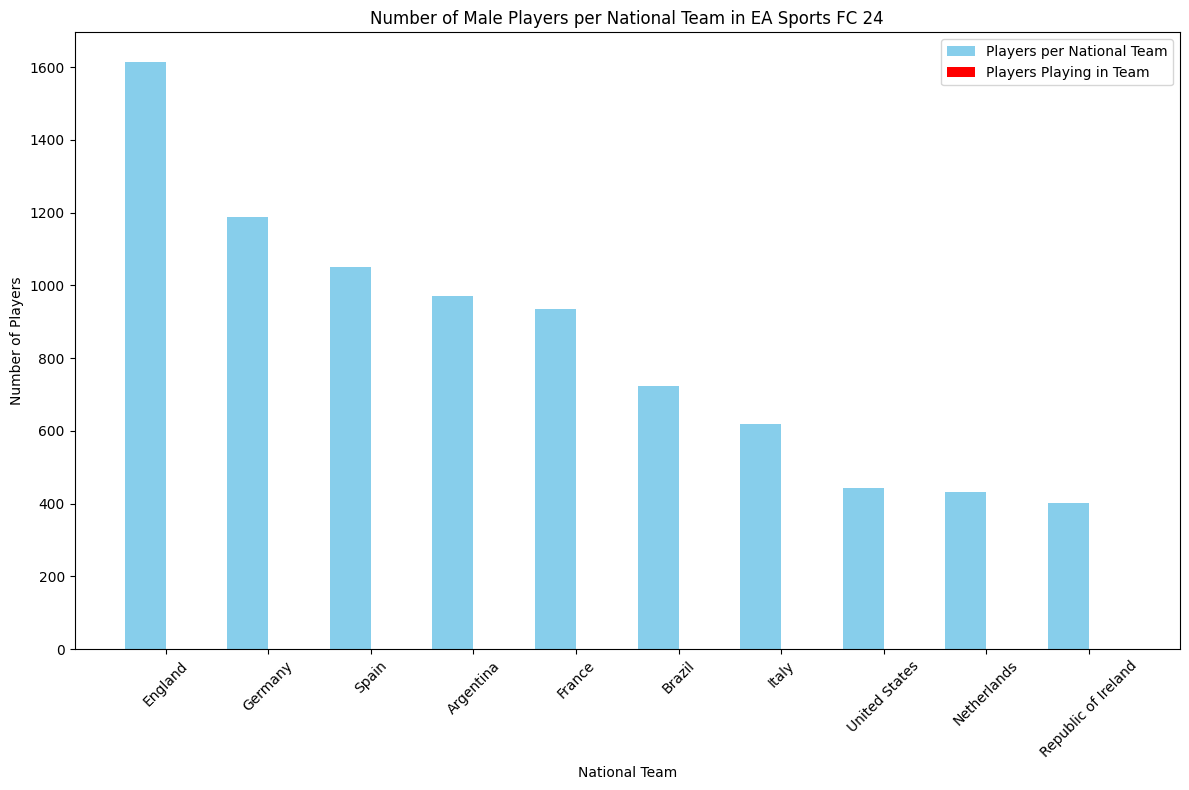

In [3944]:

import numpy as np

# Assuming df_players is already defined and preprocessed

# Filter for male players in EA Sports FC 24
male_players_24 = df_players[(df_players['Sex'] == 1) & (df_players['fifa_version'] == 24)]

# Group by nationality name and count unique player ids
players_per_national_team = male_players_24.groupby('nationality_name')['player_id'].nunique().sort_values(ascending=False).head(10)
players_playing_in_team = male_players_24.groupby('nationality_name')['nation_team_id'].nunique().sort_values(ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.4
index = np.arange(len(players_per_national_team))

# Plot each set of bars
bar1 = ax.bar(index, players_per_national_team, bar_width, label='Players per National Team', color='skyblue')
bar2 = ax.bar(index + bar_width, players_playing_in_team, bar_width, label='Players Playing in Team', color='r')

# Add labels, title, and legend
ax.set_xlabel('National Team')
ax.set_ylabel('Number of Players')
ax.set_title('Number of Male Players per National Team in EA Sports FC 24')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(players_per_national_team.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


we have only visualized 10 national teams with the number of players associated with them

## h)

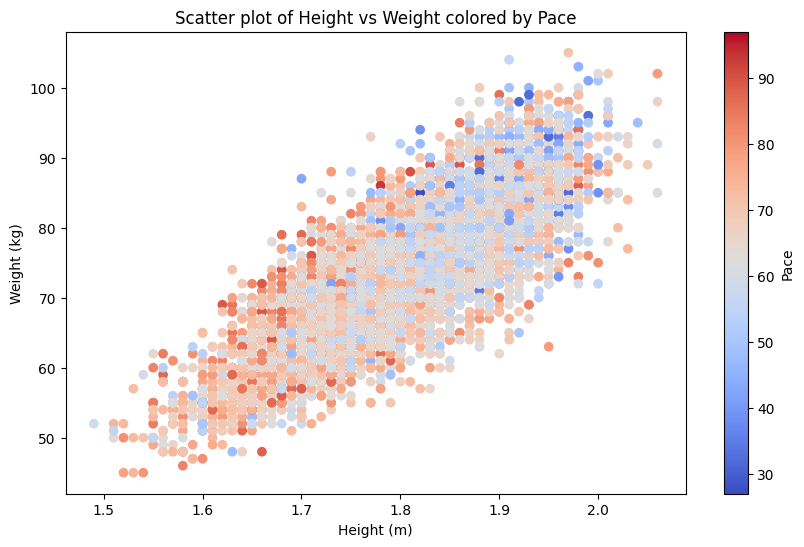

In [3979]:

# Assuming df_player is your DataFrame containing player data
df_new_players24 = df_player[df_player['fifa_version'] == 24]

# Selecting relevant columns
df = pd.DataFrame(df_new_players24, columns=['pace', 'height_m', 'weight_kg'])

# Plotting with 'coolwarm' colormap
plt.figure(figsize=(10, 6)) 
plt.scatter(x=df['height_m'], y=df['weight_kg'], c=df['pace'], cmap='coolwarm', vmin=df['pace'].min(), vmax=df['pace'].max())
plt.colorbar(label='Pace')  
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.title('Scatter plot of Height vs Weight colored by Pace')
plt.show()


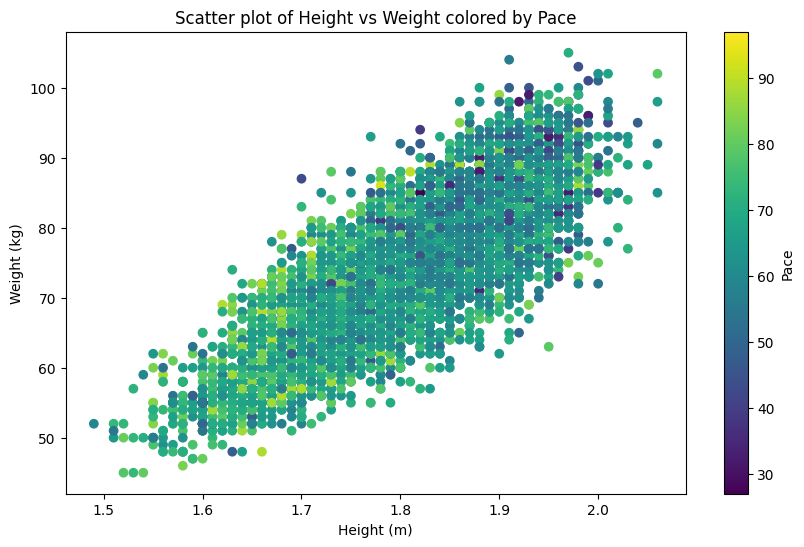

In [3945]:
df_new_players24 = df_player[df_player['fifa_version'] == 24]
df = pd.DataFrame(df_new_players24, columns=['pace', 'height_m', 'weight_kg'])

plt.figure(figsize=(10, 6)) 
plt.scatter(x=df['height_m'], y=df['weight_kg'], c=df['pace'], cmap='viridis')
plt.colorbar(label='Pace')  
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.title('Scatter plot of Height vs Weight colored by Pace')
plt.show()

## i)


In [3946]:
#creating a column named average skills
df_player.loc[:,'average_skills']=(df_player['pace']+df_player['shooting']+df_player['passing']+df_player['dribbling']+df_player['defending']+df_player['physic'])/6
df_player.loc[:,'average_skills']=df_player.loc[:,'average_skills'].astype(int)

C:\Users\kashi\AppData\Local\Temp\ipykernel_12980\2620879404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player.loc[:,'average_skills']=(df_player['pace']+df_player['shooting']+df_player['passing']+df_player['dribbling']+df_player['defending']+df_player['physic'])/6


In [3947]:
# plyaer with best average skills in all versions of the game
id = df_player.loc[df_player['average_skills'].idxmax()]
skill=id['average_skills']
name=id['long_name']
print(f'The player with the best average skills is {name} with average skill of {skill}')

The player with the best average skills is Alexia Putellas Segura with average skill of 84.0


In [3948]:
df_topplayers=df_player.sort_values(by='average_skills', ascending=False).head(10)
names=df_topplayers['long_name']
print('The top 10 players with highest skills are:')
for i, name in enumerate(names, 1):
    print(f'{i}. {name}')

The top 10 players with highest skills are:
1. Alexia Putellas Segura
2. Lucia Roberta Tough Bronze
3. Federico Santiago Valverde Dipetta
4. Alexia Putellas Segura
5. Leon Christoph Goretzka
6. Leon Christoph Goretzka
7. Fridolina Rolfö
8. Carli Anne Hollins
9. Amel Majri
10. Carli Anne Hollins


## j)

In [3949]:
df_team.columns

Index(['team_id', 'fifa_version', 'team_name', 'league_id', 'league_name',
       'nationality_id', 'nationality_name', 'overall', 'attack', 'midfield',
       'defence', 'coach_id', 'home_stadium', 'whole_team_average_age',
       'captain', 'penalties', 'left_corner', 'right_corner', 'Sex'],
      dtype='object')

In [3950]:
# creating the new data frame with only players which are avilable in EA Sports FC 24
df_new=df_player[df_player['fifa_version']==24]
# counting the players in each team
players_count = df_new.groupby('club_name').size().reset_index(name='number of players')
players_count=players_count.sort_values(by='number of players',ascending=False)
players_count=players_count.reset_index(drop=True)
players_count

,club_name,number of players
0,free_agent,199
1,Liverpool,53
2,River Plate,49
3,Sevilla,33
4,Udinese,33
...,...,...
737,Palmaflor del Trópico,19
738,Deportivo Binacional,19
739,Santa Fe,19
740,Guabirá,19


In [3951]:
# visualization pending

## k)

In [3952]:
# number of teams in each game 
team_count = df_team.groupby('fifa_version').size().reset_index(name='number of teams')
team_count

,fifa_version,number of teams
0,15,625
1,16,664
2,17,693
3,18,712
4,19,713
5,20,733
6,21,746
7,22,751
8,23,753
9,24,788


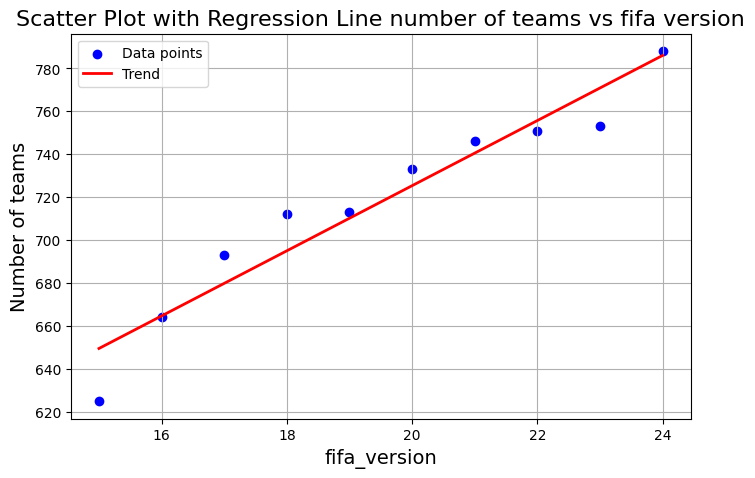

In [3953]:
# ploting the number of teams with fifa_version
plt.figure(figsize=(8, 5))
x=team_count['fifa_version']
y=team_count['number of teams']
plt.scatter(x, y, color='blue', label='Data points')
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Trend', linewidth=2)

plt.title("Scatter Plot with Regression Line number of teams vs fifa version", fontsize=16)
plt.xlabel("fifa_version", fontsize=14)
plt.ylabel("Number of teams", fontsize=14)


plt.legend()


plt.grid(True)
plt.show()

as we can see the number of teams are increasing in each fifa version

## l)

In [3954]:
df_coach.columns

Index(['coach_id', 'long_name', 'dob', 'nationality_name', 'Sex'], dtype='object')

In [3955]:
teams_per_country=df_team.groupby(['nationality_name','fifa_version'])['team_name'].nunique().reset_index()
teams_per_country
teams_pivot = teams_per_country.pivot(index='fifa_version', columns='nationality_name', values='team_name')

teams_pivot

nationality_name,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Cameroon,Canada,Chile,China PR,Colombia,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Denmark,Ecuador,Egypt,England,Finland,France,Germany,Ghana,Greece,Hungary,Iceland,India,Italy,Japan,Korea Republic,Mexico,Monaco,Morocco,Netherlands,New Zealand,Northern Ireland,Norway,Paraguay,Peru,Poland,Portugal,Qatar,Republic of Ireland,Romania,Russia,Saudi Arabia,Scotland,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Arab Emirates,United States,Uruguay,Venezuela,Wales
fifa_version,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,21.0,11.0,11.0,17.0,1.0,1.0,1.0,1.0,NaN,19.0,NaN,19.0,NaN,NaN,1.0,1.0,13.0,1.0,1.0,93.0,1.0,41.0,37.0,NaN,4.0,1.0,NaN,1.0,43.0,NaN,13.0,19.0,NaN,NaN,19.0,1.0,1.0,17.0,1.0,1.0,17.0,19.0,NaN,13.0,1.0,17.0,14.0,14.0,1.0,3.0,43.0,17.0,11.0,19.0,1.0,NaN,20.0,1.0,1.0,1.0
16,31.0,11.0,11.0,17.0,1.0,18.0,1.0,1.0,2.0,17.0,2.0,21.0,NaN,NaN,1.0,1.0,13.0,1.0,1.0,94.0,1.0,42.0,38.0,NaN,4.0,1.0,NaN,1.0,43.0,NaN,12.0,20.0,NaN,NaN,19.0,1.0,1.0,17.0,1.0,1.0,17.0,19.0,NaN,13.0,1.0,17.0,14.0,13.0,1.0,3.0,44.0,18.0,11.0,19.0,1.0,NaN,22.0,1.0,1.0,1.0
17,31.0,11.0,11.0,17.0,1.0,25.0,1.0,1.0,2.0,17.0,2.0,21.0,NaN,NaN,1.0,1.0,15.0,1.0,1.0,94.0,2.0,42.0,38.0,NaN,4.0,1.0,NaN,1.0,43.0,18.0,12.0,20.0,NaN,NaN,20.0,NaN,1.0,18.0,1.0,1.0,17.0,19.0,NaN,13.0,1.0,17.0,14.0,13.0,1.0,3.0,44.0,18.0,11.0,19.0,1.0,NaN,22.0,1.0,1.0,1.0
18,29.0,11.0,11.0,17.0,1.0,18.0,1.0,1.0,2.0,17.0,2.0,21.0,NaN,NaN,2.0,1.0,15.0,1.0,1.0,94.0,2.0,42.0,58.0,NaN,5.0,1.0,1.0,1.0,43.0,18.0,12.0,20.0,NaN,NaN,20.0,1.0,1.0,18.0,1.0,1.0,17.0,19.0,NaN,13.0,1.0,17.0,15.0,13.0,1.0,3.0,44.0,18.0,11.0,19.0,1.0,NaN,24.0,1.0,1.0,1.0
19,27.0,11.0,14.0,17.0,1.0,17.0,1.0,1.0,2.0,17.0,16.0,21.0,1.0,NaN,4.0,1.0,15.0,1.0,1.0,94.0,2.0,41.0,58.0,NaN,5.0,1.0,1.0,1.0,40.0,18.0,12.0,20.0,NaN,NaN,20.0,1.0,1.0,18.0,1.0,1.0,17.0,19.0,NaN,11.0,1.0,4.0,16.0,13.0,1.0,3.0,44.0,18.0,11.0,19.0,2.0,NaN,25.0,1.0,1.0,1.0
20,25.0,12.0,13.0,17.0,1.0,17.0,1.0,1.0,2.0,17.0,18.0,21.0,1.0,NaN,4.0,1.0,15.0,1.0,1.0,94.0,2.0,42.0,58.0,NaN,5.0,1.0,1.0,1.0,41.0,19.0,12.0,21.0,NaN,NaN,19.0,1.0,1.0,18.0,1.0,1.0,18.0,19.0,NaN,11.0,15.0,4.0,16.0,14.0,1.0,3.0,44.0,18.0,11.0,19.0,2.0,1.0,26.0,1.0,1.0,1.0
21,26.0,13.0,13.0,19.0,7.0,20.0,1.0,1.0,2.0,7.0,18.0,8.0,1.0,NaN,4.0,1.0,13.0,9.0,1.0,94.0,2.0,42.0,58.0,NaN,5.0,1.0,1.0,1.0,27.0,19.0,12.0,20.0,NaN,NaN,19.0,1.0,1.0,18.0,8.0,7.0,18.0,19.0,NaN,11.0,17.0,4.0,16.0,14.0,1.0,3.0,44.0,18.0,11.0,22.0,2.0,1.0,28.0,7.0,7.0,1.0
22,27.0,12.0,13.0,20.0,7.0,20.0,NaN,NaN,3.0,6.0,18.0,8.0,2.0,1.0,4.0,NaN,13.0,7.0,NaN,94.0,2.0,42.0,58.0,NaN,5.0,2.0,1.0,11.0,26.0,20.0,12.0,20.0,NaN,NaN,19.0,2.0,1.0,18.0,7.0,6.0,20.0,20.0,NaN,11.0,17.0,4.0,16.0,14.0,NaN,2.0,44.0,18.0,10.0,20.0,3.0,1.0,28.0,6.0,6.0,2.0
23,30.0,12.0,13.0,20.0,7.0,17.0,NaN,NaN,5.0,7.0,20.0,7.0,3.0,1.0,4.0,NaN,13.0,8.0,NaN,103.0,2.0,53.0,58.0,1.0,3.0,2.0,2.0,11.0,41.0,NaN,12.0,2.0,1.0,1.0,20.0,2.0,2.0,18.0,7.0,6.0,19.0,20.0,1.0,10.0,17.0,NaN,16.0,14.0,NaN,3.0,44.0,18.0,10.0,19.0,3.0,1.0,27.0,6.0,6.0,5.0


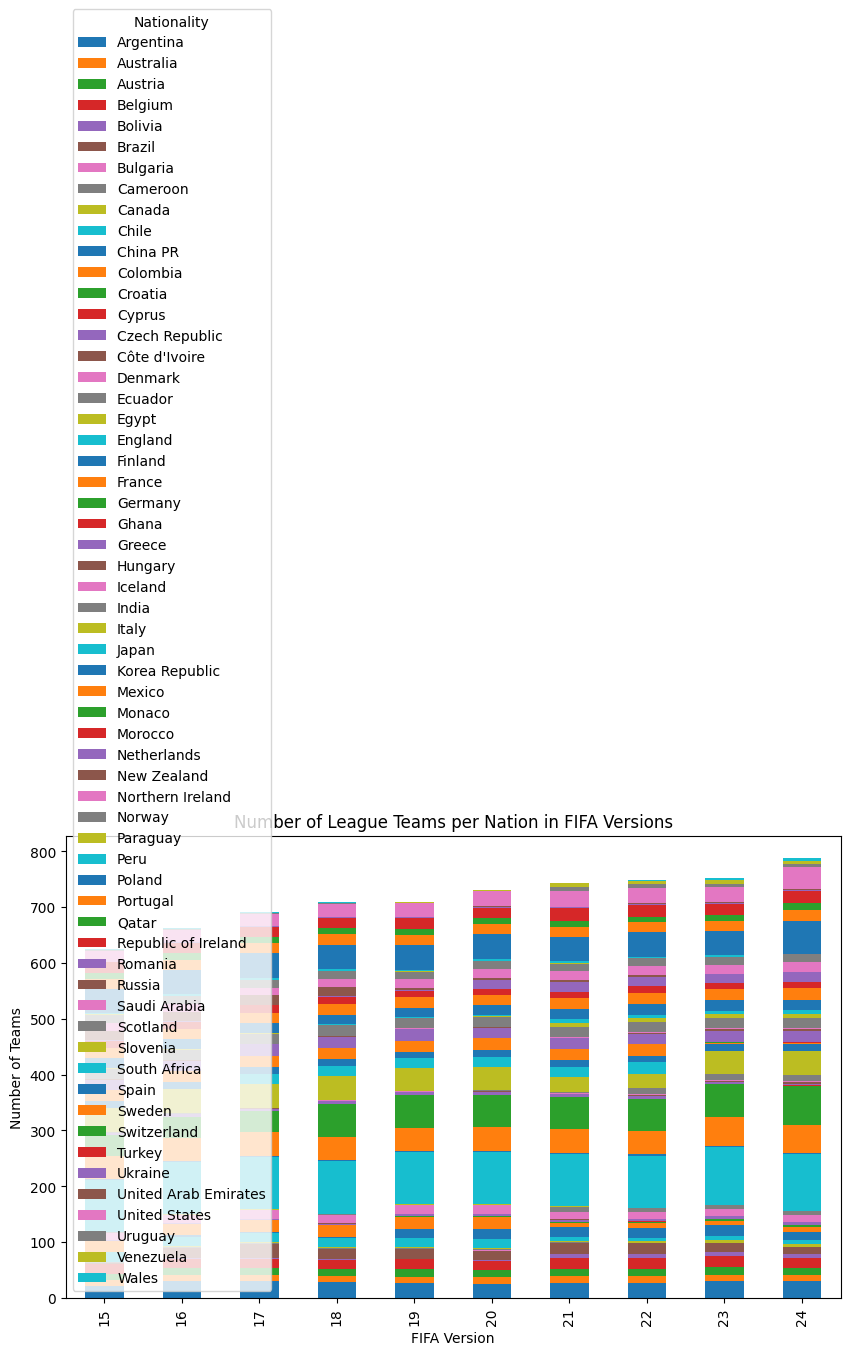

In [3956]:
teams_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of League Teams per Nation in FIFA Versions')
plt.xlabel('FIFA Version')
plt.ylabel('Number of Teams')
plt.legend(title='Nationality')
plt.show()

## m)

In [3957]:
# creating a data fram with the given players
players=['Alexia Putellas Segura','Erling Braut Haaland','Kylian Mbappé Lottin','Lionel Andrés Messi Cuccittini','Cristiano Ronaldo dos Santos Aveiro']
df_new_players=df_player[df_player['long_name'].isin(players)]
# sorting the data frame w.r.t lone_name and fifa_version ascending and descending order.
df_new_players=df_new_players.sort_values(by=['long_name','fifa_version'],ascending=[True,False])

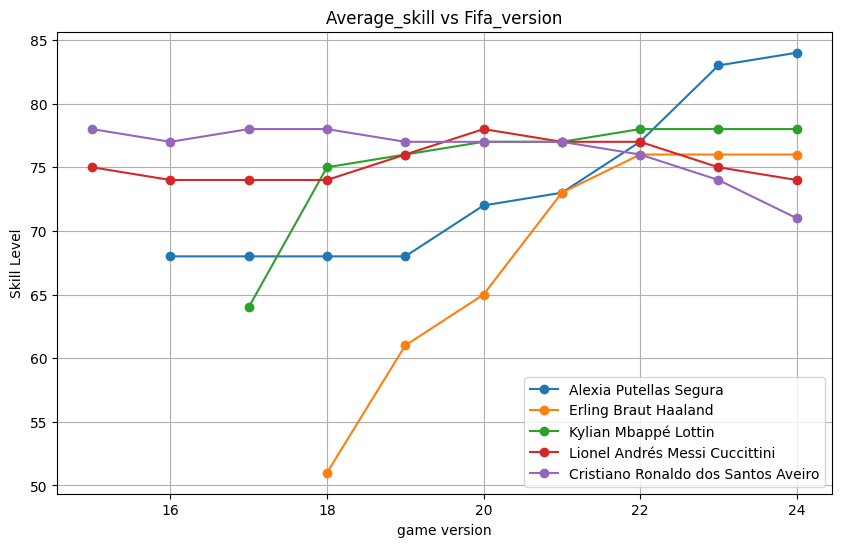

In [3958]:
# Trend in skill level over the years
plt.figure(figsize=(10, 6)) 
for player in players:
    player_data = df_new_players[df_new_players['long_name'] == player]
    plt.plot(player_data['fifa_version'], player_data['average_skills'], marker='o', label=player)

plt.xlabel('game version')
plt.ylabel('Skill Level')
plt.title('Average_skill vs Fifa_version')
plt.legend()
plt.grid(True)
plt.show()

The above is thew graph for skill level and game version it can be seen that skill level increases with the increase in game version.

In [3959]:
df_new_players.columns

Index(['player_id', 'fifa_version', 'long_name', 'player_positions',
       'value_mio_eur', 'wage_eur', 'dob', 'height_m', 'weight_kg',
       'club_team_id', 'club_name', 'league_id', 'league_name',
       'club_position', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'nation_team_id', 'preferred_foot', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'Sex', 'average_skills'],
      dtype='object')

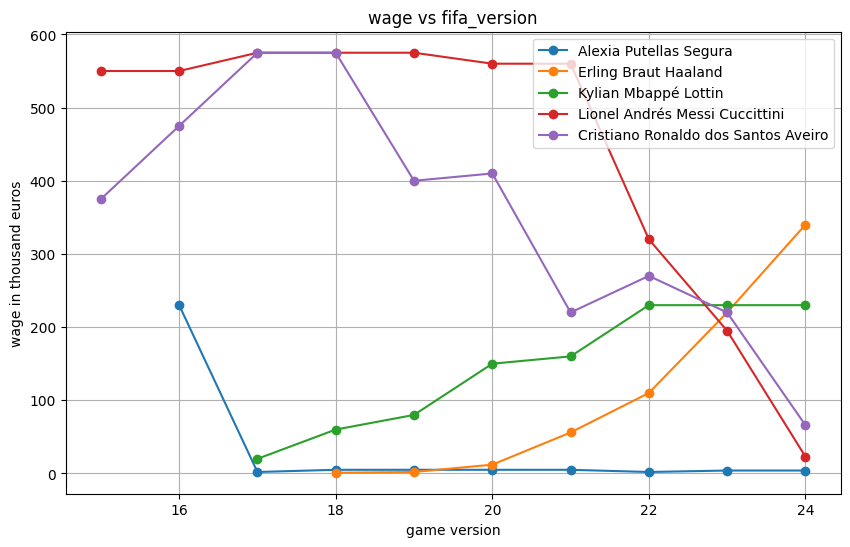

In [3960]:
# Trend in between wages and fifa version
plt.figure(figsize=(10, 6)) 
for player in players:
    player_data = df_new_players[df_new_players['long_name'] == player]
    plt.plot(player_data['fifa_version'], player_data['wage_eur']/1000, marker='o', label=player)

plt.xlabel('game version')
plt.ylabel('wage in thousand euros')
plt.title('wage vs fifa_version')
plt.legend()
plt.grid(True)
plt.show()

i will visualize the overall trend between skills and salary amoung the given playerds only

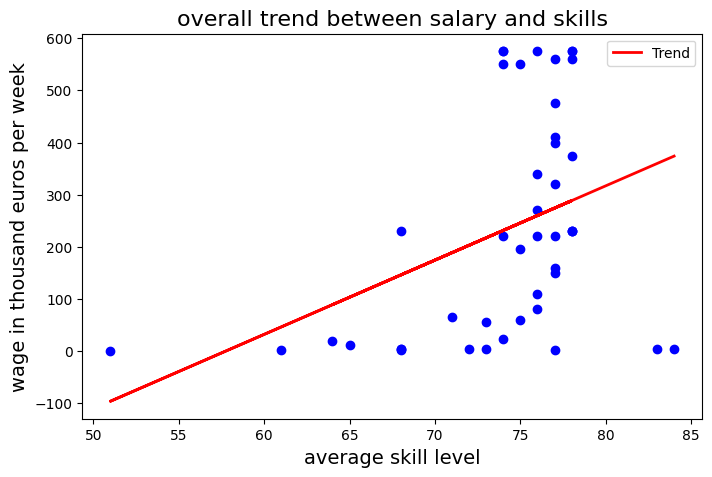

In [3961]:
# Trend in between salary and skills
plt.figure(figsize=(8, 5))
y=df_new_players['wage_eur']/1000
x=df_new_players['average_skills']
plt.scatter(x, y, color='b')
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Trend', linewidth=2)

plt.title("overall trend between salary and skills", fontsize=16)
plt.ylabel("wage in thousand euros per week", fontsize=14)
plt.xlabel("average skill level", fontsize=14)

plt.legend()


plt.show()

it can be seen that the salary increase with the increase in theaverage skill level

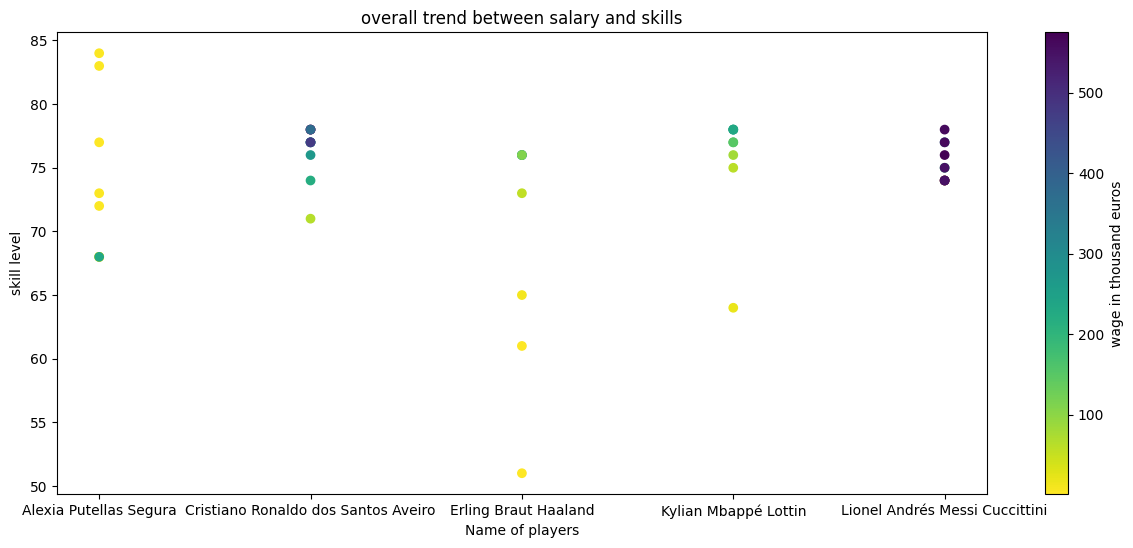

In [3967]:
import  matplotlib.colors 

df = pd.DataFrame(df_new_players, columns=['long_name', 'wage_eur', 'average_skills'])


norm = matplotlib.colors .Normalize(vmin=(df['wage_eur']/1000).min(), vmax=(df['wage_eur']/1000).max())
cmap = plt.cm.viridis_r  

plt.figure(figsize=(15, 6))  
sc = plt.scatter(x=df['long_name'], y=df['average_skills'], c=df['wage_eur']/1000, cmap=cmap, norm=norm)
plt.colorbar(sc, label='wage in thousand euros') 
plt.xlabel('Name of players')
plt.ylabel('skill level')
plt.title('overall trend between salary and skills')
plt.show()


it can be seen that the skill level impacts the salary of the players but also depends on the popularity of the player